<header>

<div class="dc-edge-to-edge@sm dc-edge-to-edge--align-center">

<div class="dc-edge-to-edge__item">

<div class="dc-chapter__title-wrapper">

#### Fine-tuning your model

</div>

</div>

<div class="dc-edge-to-edge__item dc-chapter__progress">

<div class="course-outline__progress"><span class="course-outline__percentage">0%</span></div>

</div>

</div>

</header>

<div class="modal--chapter-text">

Having trained your model, your next task is to evaluate its performance. What metrics can you use to gauge how good your model is? So far, you have used accuracy for classification and R-squared for regression. In this chapter, you will learn about some of the other metrics available in scikit-learn that will allow you to assess your model's performance in a more nuanced manner. You will then learn to optimize both your classification as well as regression models using hyperparameter tuning.

</div>

* How good is your model?
50 XP

* Metrics for classification
100 XP

* Logistic regression and the ROC curve
50 XP

* Building a logistic regression model
100 XP

* Plotting an ROC curve
100 XP

* Precision-recall Curve
100 XP

* Area under the ROC curve
50 XP

* AUC computation
100 XP

* Hyperparameter tuning
50 XP

* Hyperparameter tuning with GridSearchCV
100 XP

* Hyperparameter tuning with RandomizedSearchCV
100 XP

* Hold-out set for final evaluation
50 XP

* Hold-out set reasoning
50 XP

* Hold-out set in practice I: Classification
100 XP

* Hold-out set in practice II: Regression
100 XP


<div class="listview__section" data-onboarding="assignment">

<div>

<div aria-hidden="true" role="button" class="listview__header" style="position: absolute; top: 0px; width: calc(100% - 23px);">

<div class="exercise--sidebar-header">

##### Exercise

</div>

</div>

</div>

<div class="listview__content">

<div class="exercise--assignment exercise--typography">

# Metrics for classification

<div>

<div>

In Chapter 1, you evaluated the performance of your k-NN classifier based on its accuracy. However, as Andy discussed, accuracy is not always an informative metric. In this exercise, you will dive more deeply into evaluating the performance of binary classifiers by computing a confusion matrix and generating a classification report.

You may have noticed in the video that the classification report consisted of three rows, and an additional _support_ column. The _support_ gives the number of samples of the true response that lie in that class - so in the video example, the support was the number of Republicans or Democrats in the test set on which the classification report was computed. The _precision_, _recall_, and _f1-score_ columns, then, gave the respective metrics for that particular class.

Here, you'll work with the [PIMA Indians](https://archive.ics.uci.edu/ml/datasets/Pima+Indians+Diabetes) dataset obtained from the UCI Machine Learning Repository. The goal is to predict whether or not a given female patient will contract diabetes based on features such as BMI, age, and number of pregnancies. Therefore, it is a binary classification problem. A target value of `0` indicates that the patient does _not_ have diabetes, while a value of `1` indicates that the patient _does_ have diabetes. As in Chapters 1 and 2, the dataset has been preprocessed to deal with missing values.

The dataset has been loaded into a DataFrame `df` and the feature and target variable arrays `X` and `y` have been created for you. In addition, `sklearn.model_selection.train_test_split` and `sklearn.neighbors.KNeighborsClassifier` have already been imported.

Your job is to train a k-NN classifier to the data and evaluate its performance by generating a confusion matrix and classification report.

</div>

</div>

</div>

</div>

</div>

<div class="listview__section" data-onboarding="instructions" style="min-height: calc(100% - 33px);">

<div>

<div role="button" class="listview__header">

<div class="exercise--sidebar-header">

##### Instructions

<span class="tag tag--xp">100 XP</span></div>

</div>

</div>

<div class="listview__content">

<div>

<div class="">

<div data-onboarding="instructions" class="exercise--instructions exercise--typography">

<div>

<div class="exercise--instructions__content">

*   Import `classification_report` and `confusion_matrix` from `sklearn.metrics`.
*   Create training and testing sets with 40% of the data used for testing. Use a random state of `42`.
*   Instantiate a k-NN classifier with `6` neighbors, fit it to the training data, and predict the labels of the test set.
*   Compute and print the confusion matrix and classification report using the `confusion_matrix()` and `classification_report()` functions.

</div>

</div>

<div class="campus-dc-sct-feedback" tabindex="-1">

<div data-tip="true" data-for="tp-hint" currentitem="true" style="display: inline-block;">

<div class="__react_component_tooltip place-right type-dark tooltip top" data-id="tooltip" style="left: 180px; top: 596px;">

<div class="tooltip-inner">Ctrl+H</div>

</div>

[<span>Take Hint (-30 XP)</span>](javascript:void(0))</div>

</div>

</div>

</div>

</div>

</div>

</div>

In [24]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set default Seaborn style
# sns.set()

X = pd.read_csv("./data/diabetesX.csv") 
y = pd.read_csv("./data/diabetesy.csv") 

# Import necessary modules
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Create training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,random_state=42)

# Instantiate a k-NN classifier: knn
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Predict the labels of the test data: y_pred
y_pred = knn.predict(X_test)

# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[176  30]
 [ 52  50]]
             precision    recall  f1-score   support

          0       0.77      0.85      0.81       206
          1       0.62      0.49      0.55       102

avg / total       0.72      0.73      0.72       308



Logistic regression and the ROC curve

https://campus.datacamp.com/courses/supervised-learning-with-scikit-learn/fine-tuning-your-model?ex=3

<div class="listview__section" data-onboarding="assignment">

<div>

<div aria-hidden="true" role="button" class="listview__header" style="position: absolute; top: 0px; width: calc(100% - 23px);">

<div class="exercise--sidebar-header">

##### Exercise

</div>

</div>

</div>

<div class="listview__content">

<div class="exercise--assignment exercise--typography">

# Building a logistic regression model

<div>

<div>

Time to build your first logistic regression model! As Hugo showed in the video, scikit-learn makes it very easy to try different models, since the Train-Test-Split/Instantiate/Fit/Predict paradigm applies to all classifiers and regressors - which are known in scikit-learn as 'estimators'. You'll see this now for yourself as you train a logistic regression model on exactly the same data as in the previous exercise. Will it outperform k-NN? There's only one way to find out!

The feature and target variable arrays `X` and `y` have been pre-loaded, and `train_test_split` has been imported for you from `sklearn.model_selection`.

</div>

</div>

</div>

</div>

</div>

<div class="listview__section" data-onboarding="instructions" style="min-height: calc(100% - 33px);">

<div>

<div role="button" class="listview__header">

<div class="exercise--sidebar-header">

##### Instructions

<span class="tag tag--xp">100 XP</span></div>

</div>

</div>

<div class="listview__content">

<div>

<div class="">

<div data-onboarding="instructions" class="exercise--instructions exercise--typography">

<div>

<div class="exercise--instructions__content">

*   Import:
    *   `LogisticRegression` from `sklearn.linear_model`.
    *   `confusion_matrix` and `classification_report` from `sklearn.metrics`.
*   Create training and test sets with 40% (or `0.4`) of the data used for testing. Use a random state of `42`. This has been done for you.
*   Instantiate a `LogisticRegression` classifier called `logreg`.
*   Fit the classifier to the training data and predict the labels of the test set.
*   Compute and print the confusion matrix and classification report. This has been done for you, so hit 'Submit Answer' to see how logistic regression compares to k-NN!

</div>

</div>

<div class="campus-dc-sct-feedback" tabindex="-1">

<div data-tip="true" data-for="tp-hint" currentitem="true" style="display: inline-block;">

<div class="__react_component_tooltip place-right type-dark tooltip top" data-id="tooltip" style="left: 180px; top: 743px;">

<div class="tooltip-inner">Ctrl+H</div>

</div>

[<span>Take Hint (-30 XP)</span>](javascript:void(0))</div>

</div>

</div>

</div>

</div>

</div>

</div>

In [25]:
# Import the necessary modules
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)

# Create the classifier: logreg
logreg = LogisticRegression()

# Fit the classifier to the training data
logreg.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = logreg.predict(X_test)

# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[176  30]
 [ 35  67]]
             precision    recall  f1-score   support

          0       0.83      0.85      0.84       206
          1       0.69      0.66      0.67       102

avg / total       0.79      0.79      0.79       308



<div class="listview__section" data-onboarding="assignment">

<div>

<div role="button" class="listview__header">

<div class="exercise--sidebar-header">

##### Exercise

</div>

</div>

<div aria-hidden="true" role="button" class="listview__header" style="position: absolute; top: 0px; width: calc(100% - 23px);">

<div class="exercise--sidebar-header">

##### Exercise

</div>

</div>

</div>

<div class="listview__content">

<div class="exercise--assignment exercise--typography">

# Plotting an ROC curve

<div>

<div>

Great job in the previous exercise - you now have a new addition to your toolbox of classifiers!

Classification reports and confusion matrices are great methods to quantitatively evaluate model performance, while ROC curves provide a way to visually evaluate models. As Hugo demonstrated in the video, most classifiers in scikit-learn have a `.predict_proba()` method which returns the probability of a given sample being in a particular class. Having built a logistic regression model, you'll now evaluate its performance by plotting an ROC curve. In doing so, you'll make use of the `.predict_proba()` method and become familiar with its functionality.

Here, you'll continue working with the PIMA Indians diabetes dataset. The classifier has already been fit to the training data and is available as `logreg`.

</div>

</div>

</div>

</div>

</div>

<div class="listview__section" data-onboarding="instructions" style="min-height: calc(100% - 33px);">

<div>

<div role="button" class="listview__header">

<div class="exercise--sidebar-header">

##### Instructions

<span class="tag tag--xp">100 XP</span></div>

</div>

</div>

<div class="listview__content">

<div>

<div class="">

<div data-onboarding="instructions" class="exercise--instructions exercise--typography">

<div>

<div class="exercise--instructions__content">

*   Import `roc_curve` from `sklearn.metrics`.
*   Using the `logreg` classifier, which has been fit to the training data, compute the predicted probabilities of the labels of the test set `X_test`. Save the result as `y_pred_prob`.
*   Use the `roc_curve()` function with `y_test` and `y_pred_prob` and unpack the result into the variables `fpr`, `tpr`, and `thresholds`.
*   Plot the ROC curve with `fpr` on the x-axis and `tpr` on the y-axis.

</div>

</div>

<div class="campus-dc-sct-feedback" tabindex="-1">

<div data-tip="true" data-for="tp-hint" currentitem="true" style="display: inline-block;">

<div class="__react_component_tooltip place-right type-dark tooltip top" data-id="tooltip" style="left: 180px; top: 705px;">

<div class="tooltip-inner">Ctrl+H</div>

</div>

[<span>Take Hint (-30 XP)</span>](javascript:void(0))</div>

</div>

</div>

</div>

</div>

</div>

</div>

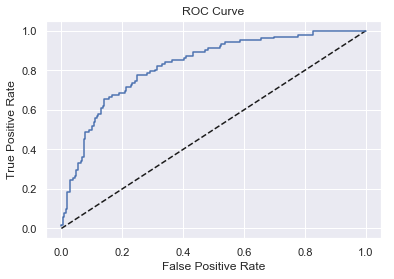

In [26]:
# Import necessary modules
from sklearn.metrics import roc_curve

# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

<div class="listview__section" data-onboarding="assignment">

<div>

<div aria-hidden="true" role="button" class="listview__header" style="position: absolute; top: 0px; width: calc(100% - 23px);">

<div class="exercise--sidebar-header">

##### Exercise

</div>

</div>

</div>

<div class="listview__content">

<div class="exercise--assignment exercise--typography">

# Precision-recall Curve

<div>

<div>

When looking at your ROC curve, you may have noticed that the y-axis (True positive rate) is also known as recall. Indeed, in addition to the ROC curve, there are other ways to visually evaluate model performance. One such way is the precision-recall curve, which is generated by plotting the precision and recall for different thresholds. As a reminder, precision and recall are defined as:

<span class="MathJax_Preview" style="color: inherit; display: none;"></span>

<div class="MathJax_Display" style="text-align: center;"><span class="MathJax" id="MathJax-Element-9-Frame" tabindex="0" style="text-align: center; position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot; display=&quot;block&quot;><nobr aria-hidden="true"><span class="math" id="MathJax-Span-69" style="width: 11.755em; display: inline-block;"><span style="display: inline-block; position: relative; width: 10.045em; height: 0px; font-size: 117%;"><span style="position: absolute; clip: rect(0.804em, 1010.04em, 3.208em, -999.997em); top: -2.294em; left: 0em;"><span class="mrow" id="MathJax-Span-70"><span class="mi" id="MathJax-Span-71" style="font-family: MathJax_Math-italic;">P<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.11em;"></span></span><span class="mi" id="MathJax-Span-72" style="font-family: MathJax_Math-italic;">r</span><span class="mi" id="MathJax-Span-73" style="font-family: MathJax_Math-italic;">e</span><span class="mi" id="MathJax-Span-74" style="font-family: MathJax_Math-italic;">c</span><span class="mi" id="MathJax-Span-75" style="font-family: MathJax_Math-italic;">i</span><span class="mi" id="MathJax-Span-76" style="font-family: MathJax_Math-italic;">s</span><span class="mi" id="MathJax-Span-77" style="font-family: MathJax_Math-italic;">i</span><span class="mi" id="MathJax-Span-78" style="font-family: MathJax_Math-italic;">o</span><span class="mi" id="MathJax-Span-79" style="font-family: MathJax_Math-italic;">n</span><span class="mo" id="MathJax-Span-80" style="font-family: MathJax_Main; padding-left: 0.27em;">=</span><span class="mfrac" id="MathJax-Span-81" style="padding-left: 0.27em;"><span style="display: inline-block; position: relative; width: 4.276em; height: 0px; margin-right: 0.11em; margin-left: 0.11em;"><span style="position: absolute; clip: rect(3.154em, 1001.45em, 4.169em, -999.997em); top: -4.698em; left: 50%; margin-left: -0.745em;"><span class="mrow" id="MathJax-Span-82"><span class="mi" id="MathJax-Span-83" style="font-family: MathJax_Math-italic;">T<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.11em;"></span></span><span class="mi" id="MathJax-Span-84" style="font-family: MathJax_Math-italic;">P<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.11em;"></span></span></span><span style="display: inline-block; width: 0px; height: 4.009em;"></span></span><span style="position: absolute; clip: rect(3.154em, 1004.17em, 4.276em, -999.997em); top: -3.309em; left: 50%; margin-left: -2.081em;"><span class="mrow" id="MathJax-Span-85"><span class="mi" id="MathJax-Span-86" style="font-family: MathJax_Math-italic;">T<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.11em;"></span></span><span class="mi" id="MathJax-Span-87" style="font-family: MathJax_Math-italic;">P<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.11em;"></span></span><span class="mo" id="MathJax-Span-88" style="font-family: MathJax_Main; padding-left: 0.216em;">+</span><span class="mi" id="MathJax-Span-89" style="font-family: MathJax_Math-italic; padding-left: 0.216em;">F<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.11em;"></span></span><span class="mi" id="MathJax-Span-90" style="font-family: MathJax_Math-italic;">P<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.11em;"></span></span></span><span style="display: inline-block; width: 0px; height: 4.009em;"></span></span><span style="position: absolute; clip: rect(0.857em, 1004.28em, 1.231em, -999.997em); top: -1.279em; left: 0em;"><span style="display: inline-block; overflow: hidden; vertical-align: 0em; border-top: 1.3px solid; width: 4.276em; height: 0px;"></span><span style="display: inline-block; width: 0px; height: 1.071em;"></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 2.3em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.934em; border-left: 0px solid; width: 0px; height: 2.628em;"></span></span></nobr><span class="MJX_Assistive_MathML MJX_Assistive_MathML_Block" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML" display="block"><mi>P</mi><mi>r</mi><mi>e</mi><mi>c</mi><mi>i</mi><mi>s</mi><mi>i</mi><mi>o</mi><mi>n</mi><mo>=</mo><mfrac><mrow><mi>T</mi><mi>P</mi></mrow><mrow><mi>T</mi><mi>P</mi><mo>+</mo><mi>F</mi><mi>P</mi></mrow></mfrac></math></span><mi>P</mi><mi>r</mi><mi>e</mi><mi>c</mi><mi>i</mi><mi>s</mi><mi>i</mi><mi>o</mi><mi>n</mi><mo>=</mo><mfrac><mrow><mi>T</mi><mi>P</mi></mrow><mrow><mi>T</mi><mi>P</mi><mo>+</mo><mi>F</mi><mi>P</mi></mrow></mfrac></math>" role="presentation"></span></div>

<script type="math/tex; mode=display" id="MathJax-Element-9">Precision = \frac{TP}{TP+FP}</script>

<span class="MathJax_Preview" style="color: inherit; display: none;"></span>

<div class="MathJax_Display" style="text-align: center;"><span class="MathJax" id="MathJax-Element-10-Frame" tabindex="0" style="text-align: center; position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot; display=&quot;block&quot;><nobr aria-hidden="true"><span class="math" id="MathJax-Span-91" style="width: 10.099em; display: inline-block;"><span style="display: inline-block; position: relative; width: 8.603em; height: 0px; font-size: 117%;"><span style="position: absolute; clip: rect(0.804em, 1008.6em, 3.208em, -999.997em); top: -2.294em; left: 0em;"><span class="mrow" id="MathJax-Span-92"><span class="mi" id="MathJax-Span-93" style="font-family: MathJax_Math-italic;">R</span><span class="mi" id="MathJax-Span-94" style="font-family: MathJax_Math-italic;">e</span><span class="mi" id="MathJax-Span-95" style="font-family: MathJax_Math-italic;">c</span><span class="mi" id="MathJax-Span-96" style="font-family: MathJax_Math-italic;">a</span><span class="mi" id="MathJax-Span-97" style="font-family: MathJax_Math-italic;">l</span><span class="mi" id="MathJax-Span-98" style="font-family: MathJax_Math-italic;">l</span><span class="mo" id="MathJax-Span-99" style="font-family: MathJax_Main; padding-left: 0.27em;">=</span><span class="mfrac" id="MathJax-Span-100" style="padding-left: 0.27em;"><span style="display: inline-block; position: relative; width: 4.436em; height: 0px; margin-right: 0.11em; margin-left: 0.11em;"><span style="position: absolute; clip: rect(3.154em, 1001.45em, 4.169em, -999.997em); top: -4.698em; left: 50%; margin-left: -0.745em;"><span class="mrow" id="MathJax-Span-101"><span class="mi" id="MathJax-Span-102" style="font-family: MathJax_Math-italic;">T<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.11em;"></span></span><span class="mi" id="MathJax-Span-103" style="font-family: MathJax_Math-italic;">P<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.11em;"></span></span></span><span style="display: inline-block; width: 0px; height: 4.009em;"></span></span><span style="position: absolute; clip: rect(3.154em, 1004.33em, 4.276em, -999.997em); top: -3.309em; left: 50%; margin-left: -2.134em;"><span class="mrow" id="MathJax-Span-104"><span class="mi" id="MathJax-Span-105" style="font-family: MathJax_Math-italic;">T<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.11em;"></span></span><span class="mi" id="MathJax-Span-106" style="font-family: MathJax_Math-italic;">P<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.11em;"></span></span><span class="mo" id="MathJax-Span-107" style="font-family: MathJax_Main; padding-left: 0.216em;">+</span><span class="mi" id="MathJax-Span-108" style="font-family: MathJax_Math-italic; padding-left: 0.216em;">F<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.11em;"></span></span><span class="mi" id="MathJax-Span-109" style="font-family: MathJax_Math-italic;">N<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.11em;"></span></span></span><span style="display: inline-block; width: 0px; height: 4.009em;"></span></span><span style="position: absolute; clip: rect(0.857em, 1004.44em, 1.231em, -999.997em); top: -1.279em; left: 0em;"><span style="display: inline-block; overflow: hidden; vertical-align: 0em; border-top: 1.3px solid; width: 4.436em; height: 0px;"></span><span style="display: inline-block; width: 0px; height: 1.071em;"></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 2.3em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.934em; border-left: 0px solid; width: 0px; height: 2.628em;"></span></span></nobr><span class="MJX_Assistive_MathML MJX_Assistive_MathML_Block" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML" display="block"><mi>R</mi><mi>e</mi><mi>c</mi><mi>a</mi><mi>l</mi><mi>l</mi><mo>=</mo><mfrac><mrow><mi>T</mi><mi>P</mi></mrow><mrow><mi>T</mi><mi>P</mi><mo>+</mo><mi>F</mi><mi>N</mi></mrow></mfrac></math></span><mi>R</mi><mi>e</mi><mi>c</mi><mi>a</mi><mi>l</mi><mi>l</mi><mo>=</mo><mfrac><mrow><mi>T</mi><mi>P</mi></mrow><mrow><mi>T</mi><mi>P</mi><mo>+</mo><mi>F</mi><mi>N</mi></mrow></mfrac></math>" role="presentation"></span></div>

<script type="math/tex; mode=display" id="MathJax-Element-10">Recall = \frac{TP}{TP+FN}</script>

On the right, a precision-recall curve has been generated for the diabetes dataset. The classification report and confusion matrix are displayed in the IPython Shell.

Study the precision-recall curve and then consider the statements given below. Choose the one statement that is **not** true. Note that here, the class is positive (1) if the individual _has_ diabetes.

</div>

</div>

</div>

</div>

</div>

<div class="listview__section" data-onboarding="instructions" style="min-height: calc(100% - 33px);">

<div>

<div role="button" class="listview__header">

<div class="exercise--sidebar-header">

##### Instructions

<span class="tag tag--xp">100 XP</span></div>

</div>

</div>

<div class="listview__content">

<div>

<div class="exercise--instructions">

<div class="exercise--instructions-title">

##### Possible Answers

</div>

<div data-onboarding="instructions" class="exercise--typography">

*   <div class="dc-edge-to-edge multiple-choice__options">

    <div class="dc-edge-to-edge__item"><label for="inp_0" class="dc-input-radio" data-cy="mce-option"><input id="inp_0" data-cy="multiple-choice-input-0" type="radio" class="dc-input-radio__input" value="1" checked=""><span class="dc-input-radio__indicator"></span>

    <div>

    <div class="dc-input-radio__text">A recall of 1 corresponds to a classifier with a low threshold in which _all_ females who contract diabetes were correctly classified as such, at the expense of many misclassifications of those who did _not_ have diabetes.</div>

    </div>

    </label></div>

    </div>

*   <div class="dc-edge-to-edge multiple-choice__options">

    <div class="dc-edge-to-edge__item"><label for="inp_1" class="dc-input-radio" data-cy="mce-option"><input id="inp_1" data-cy="multiple-choice-input-1" type="radio" class="dc-input-radio__input" value="2"><span class="dc-input-radio__indicator"></span>

    <div>

    <div class="dc-input-radio__text">Precision is undefined for a classifier which makes _no_ positive predictions, that is, classifies _everyone_ as _not_ having diabetes.</div>

    </div>

    </label></div>

    </div>

*   <div class="dc-edge-to-edge multiple-choice__options">

    <div class="dc-edge-to-edge__item"><label for="inp_2" class="dc-input-radio" data-cy="mce-option"><input id="inp_2" data-cy="multiple-choice-input-2" type="radio" class="dc-input-radio__input" value="3"><span class="dc-input-radio__indicator"></span>

    <div>

    <div class="dc-input-radio__text">When the threshold is very close to 1, precision is also 1, because the classifier is absolutely certain about its predictions.</div>

    </div>

    </label></div>

    </div>

*   <div class="dc-edge-to-edge multiple-choice__options">

    <div class="dc-edge-to-edge__item"><label for="inp_3" class="dc-input-radio" data-cy="mce-option"><input id="inp_3" data-cy="multiple-choice-input-3" type="radio" class="dc-input-radio__input" value="4"><span class="dc-input-radio__indicator"></span>

    <div>

    <div class="dc-input-radio__text">Precision and recall take _true negatives_ into consideration.</div>

    </div>

    </label></div>

    </div>

<div class="multiple-choice__actions">

<div class="exercise--buttons">

<div data-tip="true" data-for="tp-submit-button" currentitem="false" style="float: right; top: -10px;"><button aria-label="button" class="dc-btn dc-btn--green dc-btn--sm" type="button" id="mc-submit" data-test-id="submit-solution-button" data-cy="submit-button"><span>

<div class="dc-btn__content">Submit Answer</div>

</span></button></div>

</div>

<div class="campus-dc-sct-feedback" tabindex="-1">

<div data-tip="true" data-for="tp-hint" currentitem="true" style="display: inline-block;">

<div class="__react_component_tooltip place-right type-dark tooltip top" data-id="tooltip" style="left: 180px; top: 437px;">

<div class="tooltip-inner">Ctrl+H</div>

</div>

[<span>Take Hint (-30 XP)</span>](javascript:void(0))</div>

</div>

</div>

</div>

</div>

</div>

</div>

</div>

<div class="listview__section" data-onboarding="assignment">

<div>

<div aria-hidden="true" role="button" class="listview__header" style="position: absolute; top: 0px; width: calc(100% - 23px);">

<div class="exercise--sidebar-header">

##### Exercise

</div>

</div>

</div>

<div class="listview__content">

<div class="exercise--assignment exercise--typography">

# Precision-recall Curve

<div>

<div>

When looking at your ROC curve, you may have noticed that the y-axis (True positive rate) is also known as recall. Indeed, in addition to the ROC curve, there are other ways to visually evaluate model performance. One such way is the precision-recall curve, which is generated by plotting the precision and recall for different thresholds. As a reminder, precision and recall are defined as:

<span class="MathJax_Preview" style="color: inherit; display: none;"></span>

<div class="MathJax_Display" style="text-align: center;"><span class="MathJax" id="MathJax-Element-9-Frame" tabindex="0" style="text-align: center; position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot; display=&quot;block&quot;><nobr aria-hidden="true"><span class="math" id="MathJax-Span-69" style="width: 11.755em; display: inline-block;"><span style="display: inline-block; position: relative; width: 10.045em; height: 0px; font-size: 117%;"><span style="position: absolute; clip: rect(0.804em, 1010.04em, 3.208em, -999.997em); top: -2.294em; left: 0em;"><span class="mrow" id="MathJax-Span-70"><span class="mi" id="MathJax-Span-71" style="font-family: MathJax_Math-italic;">P<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.11em;"></span></span><span class="mi" id="MathJax-Span-72" style="font-family: MathJax_Math-italic;">r</span><span class="mi" id="MathJax-Span-73" style="font-family: MathJax_Math-italic;">e</span><span class="mi" id="MathJax-Span-74" style="font-family: MathJax_Math-italic;">c</span><span class="mi" id="MathJax-Span-75" style="font-family: MathJax_Math-italic;">i</span><span class="mi" id="MathJax-Span-76" style="font-family: MathJax_Math-italic;">s</span><span class="mi" id="MathJax-Span-77" style="font-family: MathJax_Math-italic;">i</span><span class="mi" id="MathJax-Span-78" style="font-family: MathJax_Math-italic;">o</span><span class="mi" id="MathJax-Span-79" style="font-family: MathJax_Math-italic;">n</span><span class="mo" id="MathJax-Span-80" style="font-family: MathJax_Main; padding-left: 0.27em;">=</span><span class="mfrac" id="MathJax-Span-81" style="padding-left: 0.27em;"><span style="display: inline-block; position: relative; width: 4.276em; height: 0px; margin-right: 0.11em; margin-left: 0.11em;"><span style="position: absolute; clip: rect(3.154em, 1001.45em, 4.169em, -999.997em); top: -4.698em; left: 50%; margin-left: -0.745em;"><span class="mrow" id="MathJax-Span-82"><span class="mi" id="MathJax-Span-83" style="font-family: MathJax_Math-italic;">T<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.11em;"></span></span><span class="mi" id="MathJax-Span-84" style="font-family: MathJax_Math-italic;">P<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.11em;"></span></span></span><span style="display: inline-block; width: 0px; height: 4.009em;"></span></span><span style="position: absolute; clip: rect(3.154em, 1004.17em, 4.276em, -999.997em); top: -3.309em; left: 50%; margin-left: -2.081em;"><span class="mrow" id="MathJax-Span-85"><span class="mi" id="MathJax-Span-86" style="font-family: MathJax_Math-italic;">T<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.11em;"></span></span><span class="mi" id="MathJax-Span-87" style="font-family: MathJax_Math-italic;">P<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.11em;"></span></span><span class="mo" id="MathJax-Span-88" style="font-family: MathJax_Main; padding-left: 0.216em;">+</span><span class="mi" id="MathJax-Span-89" style="font-family: MathJax_Math-italic; padding-left: 0.216em;">F<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.11em;"></span></span><span class="mi" id="MathJax-Span-90" style="font-family: MathJax_Math-italic;">P<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.11em;"></span></span></span><span style="display: inline-block; width: 0px; height: 4.009em;"></span></span><span style="position: absolute; clip: rect(0.857em, 1004.28em, 1.231em, -999.997em); top: -1.279em; left: 0em;"><span style="display: inline-block; overflow: hidden; vertical-align: 0em; border-top: 1.3px solid; width: 4.276em; height: 0px;"></span><span style="display: inline-block; width: 0px; height: 1.071em;"></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 2.3em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.934em; border-left: 0px solid; width: 0px; height: 2.628em;"></span></span></nobr><span class="MJX_Assistive_MathML MJX_Assistive_MathML_Block" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML" display="block"><mi>P</mi><mi>r</mi><mi>e</mi><mi>c</mi><mi>i</mi><mi>s</mi><mi>i</mi><mi>o</mi><mi>n</mi><mo>=</mo><mfrac><mrow><mi>T</mi><mi>P</mi></mrow><mrow><mi>T</mi><mi>P</mi><mo>+</mo><mi>F</mi><mi>P</mi></mrow></mfrac></math></span><mi>P</mi><mi>r</mi><mi>e</mi><mi>c</mi><mi>i</mi><mi>s</mi><mi>i</mi><mi>o</mi><mi>n</mi><mo>=</mo><mfrac><mrow><mi>T</mi><mi>P</mi></mrow><mrow><mi>T</mi><mi>P</mi><mo>+</mo><mi>F</mi><mi>P</mi></mrow></mfrac></math>" role="presentation"></span></div>

<script type="math/tex; mode=display" id="MathJax-Element-9">Precision = \frac{TP}{TP+FP}</script>

<span class="MathJax_Preview" style="color: inherit; display: none;"></span>

<div class="MathJax_Display" style="text-align: center;"><span class="MathJax" id="MathJax-Element-10-Frame" tabindex="0" style="text-align: center; position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot; display=&quot;block&quot;><nobr aria-hidden="true"><span class="math" id="MathJax-Span-91" style="width: 10.099em; display: inline-block;"><span style="display: inline-block; position: relative; width: 8.603em; height: 0px; font-size: 117%;"><span style="position: absolute; clip: rect(0.804em, 1008.6em, 3.208em, -999.997em); top: -2.294em; left: 0em;"><span class="mrow" id="MathJax-Span-92"><span class="mi" id="MathJax-Span-93" style="font-family: MathJax_Math-italic;">R</span><span class="mi" id="MathJax-Span-94" style="font-family: MathJax_Math-italic;">e</span><span class="mi" id="MathJax-Span-95" style="font-family: MathJax_Math-italic;">c</span><span class="mi" id="MathJax-Span-96" style="font-family: MathJax_Math-italic;">a</span><span class="mi" id="MathJax-Span-97" style="font-family: MathJax_Math-italic;">l</span><span class="mi" id="MathJax-Span-98" style="font-family: MathJax_Math-italic;">l</span><span class="mo" id="MathJax-Span-99" style="font-family: MathJax_Main; padding-left: 0.27em;">=</span><span class="mfrac" id="MathJax-Span-100" style="padding-left: 0.27em;"><span style="display: inline-block; position: relative; width: 4.436em; height: 0px; margin-right: 0.11em; margin-left: 0.11em;"><span style="position: absolute; clip: rect(3.154em, 1001.45em, 4.169em, -999.997em); top: -4.698em; left: 50%; margin-left: -0.745em;"><span class="mrow" id="MathJax-Span-101"><span class="mi" id="MathJax-Span-102" style="font-family: MathJax_Math-italic;">T<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.11em;"></span></span><span class="mi" id="MathJax-Span-103" style="font-family: MathJax_Math-italic;">P<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.11em;"></span></span></span><span style="display: inline-block; width: 0px; height: 4.009em;"></span></span><span style="position: absolute; clip: rect(3.154em, 1004.33em, 4.276em, -999.997em); top: -3.309em; left: 50%; margin-left: -2.134em;"><span class="mrow" id="MathJax-Span-104"><span class="mi" id="MathJax-Span-105" style="font-family: MathJax_Math-italic;">T<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.11em;"></span></span><span class="mi" id="MathJax-Span-106" style="font-family: MathJax_Math-italic;">P<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.11em;"></span></span><span class="mo" id="MathJax-Span-107" style="font-family: MathJax_Main; padding-left: 0.216em;">+</span><span class="mi" id="MathJax-Span-108" style="font-family: MathJax_Math-italic; padding-left: 0.216em;">F<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.11em;"></span></span><span class="mi" id="MathJax-Span-109" style="font-family: MathJax_Math-italic;">N<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.11em;"></span></span></span><span style="display: inline-block; width: 0px; height: 4.009em;"></span></span><span style="position: absolute; clip: rect(0.857em, 1004.44em, 1.231em, -999.997em); top: -1.279em; left: 0em;"><span style="display: inline-block; overflow: hidden; vertical-align: 0em; border-top: 1.3px solid; width: 4.436em; height: 0px;"></span><span style="display: inline-block; width: 0px; height: 1.071em;"></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 2.3em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.934em; border-left: 0px solid; width: 0px; height: 2.628em;"></span></span></nobr><span class="MJX_Assistive_MathML MJX_Assistive_MathML_Block" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML" display="block"><mi>R</mi><mi>e</mi><mi>c</mi><mi>a</mi><mi>l</mi><mi>l</mi><mo>=</mo><mfrac><mrow><mi>T</mi><mi>P</mi></mrow><mrow><mi>T</mi><mi>P</mi><mo>+</mo><mi>F</mi><mi>N</mi></mrow></mfrac></math></span><mi>R</mi><mi>e</mi><mi>c</mi><mi>a</mi><mi>l</mi><mi>l</mi><mo>=</mo><mfrac><mrow><mi>T</mi><mi>P</mi></mrow><mrow><mi>T</mi><mi>P</mi><mo>+</mo><mi>F</mi><mi>N</mi></mrow></mfrac></math>" role="presentation"></span></div>

<script type="math/tex; mode=display" id="MathJax-Element-10">Recall = \frac{TP}{TP+FN}</script>

On the right, a precision-recall curve has been generated for the diabetes dataset. The classification report and confusion matrix are displayed in the IPython Shell.

Study the precision-recall curve and then consider the statements given below. Choose the one statement that is **not** true. Note that here, the class is positive (1) if the individual _has_ diabetes.

</div>

</div>

</div>

</div>

</div>

<div class="listview__section" data-onboarding="instructions" style="min-height: calc(100% - 33px);">

<div>

<div role="button" class="listview__header">

<div class="exercise--sidebar-header">

##### Instructions

<span class="tag tag--xp">100 XP</span></div>

</div>

</div>

<div class="listview__content">

<div>

<div class="exercise--instructions">

<div class="exercise--instructions-title">

##### Possible Answers

</div>

<div data-onboarding="instructions" class="exercise--typography">

*   <div class="dc-edge-to-edge multiple-choice__options">

    <div class="dc-edge-to-edge__item"><label for="inp_0" class="dc-input-radio" data-cy="mce-option"><input id="inp_0" data-cy="multiple-choice-input-0" type="radio" class="dc-input-radio__input" value="1" checked=""><span class="dc-input-radio__indicator"></span>

    <div>

    <div class="dc-input-radio__text">A recall of 1 corresponds to a classifier with a low threshold in which _all_ females who contract diabetes were correctly classified as such, at the expense of many misclassifications of those who did _not_ have diabetes.</div>

    </div>

    </label></div>

    </div>

*   <div class="dc-edge-to-edge multiple-choice__options">

    <div class="dc-edge-to-edge__item"><label for="inp_1" class="dc-input-radio" data-cy="mce-option"><input id="inp_1" data-cy="multiple-choice-input-1" type="radio" class="dc-input-radio__input" value="2"><span class="dc-input-radio__indicator"></span>

    <div>

    <div class="dc-input-radio__text">Precision is undefined for a classifier which makes _no_ positive predictions, that is, classifies _everyone_ as _not_ having diabetes.</div>

    </div>

    </label></div>

    </div>

*   <div class="dc-edge-to-edge multiple-choice__options">

    <div class="dc-edge-to-edge__item"><label for="inp_2" class="dc-input-radio" data-cy="mce-option"><input id="inp_2" data-cy="multiple-choice-input-2" type="radio" class="dc-input-radio__input" value="3"><span class="dc-input-radio__indicator"></span>

    <div>

    <div class="dc-input-radio__text">When the threshold is very close to 1, precision is also 1, because the classifier is absolutely certain about its predictions.</div>

    </div>

    </label></div>

    </div>

*   <div class="dc-edge-to-edge multiple-choice__options">

    <div class="dc-edge-to-edge__item"><label for="inp_3" class="dc-input-radio" data-cy="mce-option"><input id="inp_3" data-cy="multiple-choice-input-3" type="radio" class="dc-input-radio__input" value="4"><span class="dc-input-radio__indicator"></span>

    <div>

    <div class="dc-input-radio__text">Precision and recall take _true negatives_ into consideration.</div>

    </div>

    </label></div>

    </div>

<div class="multiple-choice__actions">

<div class="exercise--buttons">

<div data-tip="true" data-for="tp-submit-button" currentitem="false" style="float: right; top: -10px;"><button aria-label="button" class="dc-btn dc-btn--green dc-btn--sm" type="button" id="mc-submit" data-test-id="submit-solution-button" data-cy="submit-button"><span>

<div class="dc-btn__content">Submit Answer</div>

</span></button></div>

</div>

<div class="campus-dc-sct-feedback" tabindex="-1">

<div data-tip="true" data-for="tp-hint" currentitem="true" style="display: inline-block;">

<div class="__react_component_tooltip place-right type-dark tooltip top" data-id="tooltip" style="left: 180px; top: 437px;">

<div class="tooltip-inner">Ctrl+H</div>

</div>

[<span>Take Hint (-30 XP)</span>](javascript:void(0))</div>

</div>

</div>

</div>

</div>

</div>

</div>

</div>



             precision    recall  f1-score   support

          0       0.83      0.85      0.84       206
          1       0.69      0.66      0.67       102

    avg / total   0.79      0.79      0.79       308

[[176  30]
 [ 35  67]]




<div class="dc-completed__status">

<div class="dc-exercise-completed all-xp">+100 XP</div>

</div>

<div class="dc-completed__message">

<div>

Great work! True negatives do not appear at all in the definitions of precision and recall.

</div>

</div>

**Area under the ROC curve**


https://campus.datacamp.com/courses/supervised-learning-with-scikit-learn/fine-tuning-your-model?ex=7

<div class="listview__section" data-onboarding="assignment">

<div>

<div aria-hidden="true" role="button" class="listview__header" style="position: absolute; top: 0px; width: calc(100% - 23px);">

<div class="exercise--sidebar-header">

##### Exercise

</div>

</div>

</div>

<div class="listview__content">

<div class="exercise--assignment exercise--typography">

# AUC computation

<div>

<div>

Say you have a binary classifier that in fact is just randomly making guesses. It would be correct approximately 50% of the time, and the resulting ROC curve would be a diagonal line in which the True Positive Rate and False Positive Rate are always equal. The Area under this ROC curve would be 0.5\. This is one way in which the AUC, which Hugo discussed in the video, is an informative metric to evaluate a model. If the AUC is greater than 0.5, the model is better than random guessing. Always a good sign!

In this exercise, you'll calculate AUC scores using the `roc_auc_score()` function from `sklearn.metrics` as well as by performing cross-validation on the diabetes dataset.

`X` and `y`, along with training and test sets `X_train`, `X_test`, `y_train`, `y_test`, have been pre-loaded for you, and a logistic regression classifier `logreg` has been fit to the training data.

</div>

</div>

</div>

</div>

</div>

<div class="listview__section" data-onboarding="instructions" style="min-height: calc(100% - 33px);">

<div>

<div role="button" class="listview__header">

<div class="exercise--sidebar-header">

##### Instructions

<span class="tag tag--xp">100 XP</span></div>

</div>

</div>

<div class="listview__content">

<div>

<div class="">

<div data-onboarding="instructions" class="exercise--instructions exercise--typography">

<div>

<div class="exercise--instructions__content">

*   Import `roc_auc_score` from `sklearn.metrics` and `cross_val_score` from `sklearn.model_selection`.
*   Using the `logreg` classifier, which has been fit to the training data, compute the predicted probabilities of the labels of the test set `X_test`. Save the result as `y_pred_prob`.
*   Compute the AUC score using the `roc_auc_score()` function, the test set labels `y_test`, and the predicted probabilities `y_pred_prob`.
*   Compute the AUC scores by performing 5-fold cross-validation. Use the `cross_val_score()` function and specify the `scoring` parameter to be `'roc_auc'`.

</div>

</div>

<div class="campus-dc-sct-feedback" tabindex="-1">

<div data-tip="true" data-for="tp-hint" currentitem="true" style="display: inline-block;">

<div class="__react_component_tooltip place-top type-dark tooltip top" data-id="tooltip" style="left: 201px; top: 389px;">

<div class="tooltip-inner">Ctrl+H</div>

</div>

[<span>Take Hint (-30 XP)</span>](javascript:void(0))</div>


</div>

</div>



In [27]:
# Import necessary modules
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

# Compute cross-validated AUC scores: cv_auc
cv_auc = cross_val_score(logreg, X, y, cv=5, scoring='roc_auc')

# Print list of AUC scores
print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))


AUC: 0.8254806777079764
AUC scores computed using 5-fold cross-validation: [0.80185185 0.8062963  0.81481481 0.86245283 0.8554717 ]


**Hyperparameter tuning**

https://campus.datacamp.com/courses/supervised-learning-with-scikit-learn/fine-tuning-your-model?ex=9

<div class="listview__section" data-onboarding="assignment">

<div>

<div aria-hidden="true" role="button" class="listview__header" style="position: absolute; top: 0px; width: calc(100% - 23px);">

<div class="exercise--sidebar-header">

##### Exercise

</div>

</div>

</div>

<div class="listview__content">

<div class="exercise--assignment exercise--typography">

# Hyperparameter tuning with GridSearchCV

<div>

<div>

Hugo demonstrated how to tune the `n_neighbors` parameter of the `KNeighborsClassifier()` using GridSearchCV on the voting dataset. You will now practice this yourself, but by using logistic regression on the diabetes dataset instead!

Like the alpha parameter of lasso and ridge regularization that you saw earlier, logistic regression also has a regularization parameter: <span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-11-Frame" tabindex="0" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><nobr aria-hidden="true"><span class="math" id="MathJax-Span-110" style="width: 0.964em; display: inline-block;"><span style="display: inline-block; position: relative; width: 0.804em; height: 0px; font-size: 117%;"><span style="position: absolute; clip: rect(1.392em, 1000.8em, 2.407em, -999.997em); top: -2.241em; left: 0em;"><span class="mrow" id="MathJax-Span-111"><span class="mi" id="MathJax-Span-112" style="font-family: MathJax_Math-italic;">C<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.056em;"></span></span></span><span style="display: inline-block; width: 0px; height: 2.246em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.059em; border-left: 0px solid; width: 0px; height: 1.003em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi>C</mi></math></span><mi>C</mi></math>" role="presentation" style="position: relative;"></span><script type="math/tex" id="MathJax-Element-11">C</script>. <span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-12-Frame" tabindex="0" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><nobr aria-hidden="true"><span class="math" id="MathJax-Span-113" style="width: 0.964em; display: inline-block;"><span style="display: inline-block; position: relative; width: 0.804em; height: 0px; font-size: 117%;"><span style="position: absolute; clip: rect(1.392em, 1000.8em, 2.407em, -999.997em); top: -2.241em; left: 0em;"><span class="mrow" id="MathJax-Span-114"><span class="mi" id="MathJax-Span-115" style="font-family: MathJax_Math-italic;">C<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.056em;"></span></span></span><span style="display: inline-block; width: 0px; height: 2.246em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.059em; border-left: 0px solid; width: 0px; height: 1.003em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi>C</mi></math></span><mi>C</mi></math>" role="presentation" style="position: relative;"></span><script type="math/tex" id="MathJax-Element-12">C</script> controls the _inverse_ of the regularization strength, and this is what you will tune in this exercise. A large <span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-13-Frame" tabindex="0" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><nobr aria-hidden="true"><span class="math" id="MathJax-Span-116" style="width: 0.964em; display: inline-block;"><span style="display: inline-block; position: relative; width: 0.804em; height: 0px; font-size: 117%;"><span style="position: absolute; clip: rect(1.392em, 1000.8em, 2.407em, -999.997em); top: -2.241em; left: 0em;"><span class="mrow" id="MathJax-Span-117"><span class="mi" id="MathJax-Span-118" style="font-family: MathJax_Math-italic;">C<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.056em;"></span></span></span><span style="display: inline-block; width: 0px; height: 2.246em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.059em; border-left: 0px solid; width: 0px; height: 1.003em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi>C</mi></math></span><mi>C</mi></math>" role="presentation" style="position: relative;"></span><script type="math/tex" id="MathJax-Element-13">C</script> can lead to an _overfit_ model, while a small <span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-14-Frame" tabindex="0" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><nobr aria-hidden="true"><span class="math" id="MathJax-Span-119" style="width: 0.964em; display: inline-block;"><span style="display: inline-block; position: relative; width: 0.804em; height: 0px; font-size: 117%;"><span style="position: absolute; clip: rect(1.392em, 1000.8em, 2.407em, -999.997em); top: -2.241em; left: 0em;"><span class="mrow" id="MathJax-Span-120"><span class="mi" id="MathJax-Span-121" style="font-family: MathJax_Math-italic;">C<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.056em;"></span></span></span><span style="display: inline-block; width: 0px; height: 2.246em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.059em; border-left: 0px solid; width: 0px; height: 1.003em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi>C</mi></math></span><mi>C</mi></math>" role="presentation" style="position: relative;"></span><script type="math/tex" id="MathJax-Element-14">C</script> can lead to an _underfit_ model.

The hyperparameter space for <span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-15-Frame" tabindex="0" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><nobr aria-hidden="true"><span class="math" id="MathJax-Span-122" style="width: 0.964em; display: inline-block;"><span style="display: inline-block; position: relative; width: 0.804em; height: 0px; font-size: 117%;"><span style="position: absolute; clip: rect(1.392em, 1000.8em, 2.407em, -999.997em); top: -2.241em; left: 0em;"><span class="mrow" id="MathJax-Span-123"><span class="mi" id="MathJax-Span-124" style="font-family: MathJax_Math-italic;">C<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.056em;"></span></span></span><span style="display: inline-block; width: 0px; height: 2.246em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.059em; border-left: 0px solid; width: 0px; height: 1.003em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi>C</mi></math></span><mi>C</mi></math>" role="presentation" style="position: relative;"></span><script type="math/tex" id="MathJax-Element-15">C</script> has been setup for you. Your job is to use GridSearchCV and logistic regression to find the optimal <span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-16-Frame" tabindex="0" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><nobr aria-hidden="true"><span class="math" id="MathJax-Span-125" style="width: 0.964em; display: inline-block;"><span style="display: inline-block; position: relative; width: 0.804em; height: 0px; font-size: 117%;"><span style="position: absolute; clip: rect(1.392em, 1000.8em, 2.407em, -999.997em); top: -2.241em; left: 0em;"><span class="mrow" id="MathJax-Span-126"><span class="mi" id="MathJax-Span-127" style="font-family: MathJax_Math-italic;">C<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.056em;"></span></span></span><span style="display: inline-block; width: 0px; height: 2.246em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.059em; border-left: 0px solid; width: 0px; height: 1.003em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi>C</mi></math></span><mi>C</mi></math>" role="presentation" style="position: relative;"></span><script type="math/tex" id="MathJax-Element-16">C</script> in this hyperparameter space. The feature array is available as `X` and target variable array is available as `y`.

You may be wondering why you aren't asked to split the data into training and test sets. Good observation! Here, we want you to focus on the process of setting up the hyperparameter grid and performing grid-search cross-validation. In practice, you will indeed want to hold out a portion of your data for evaluation purposes, and you will learn all about this in the next video!

</div>

</div>

</div>

</div>

</div>

<div class="listview__section" data-onboarding="instructions" style="min-height: calc(100% - 33px);">

<div>

<div role="button" class="listview__header">

<div class="exercise--sidebar-header">

##### Instructions

<span class="tag tag--xp">100 XP</span></div>

</div>

</div>

<div class="listview__content">

<div>

<div class="">

<div data-onboarding="instructions" class="exercise--instructions exercise--typography">

<div>

<div class="exercise--instructions__content">

*   Import `LogisticRegression` from `sklearn.linear_model` and `GridSearchCV` from `sklearn.model_selection`.
*   Setup the hyperparameter grid by using `c_space` as the grid of values to tune <span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-17-Frame" tabindex="0" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><nobr aria-hidden="true"><span class="math" id="MathJax-Span-128" style="width: 0.964em; display: inline-block;"><span style="display: inline-block; position: relative; width: 0.804em; height: 0px; font-size: 117%;"><span style="position: absolute; clip: rect(1.392em, 1000.8em, 2.407em, -999.997em); top: -2.241em; left: 0em;"><span class="mrow" id="MathJax-Span-129"><span class="mi" id="MathJax-Span-130" style="font-family: MathJax_Math-italic;">C<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.056em;"></span></span></span><span style="display: inline-block; width: 0px; height: 2.246em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.059em; border-left: 0px solid; width: 0px; height: 1.003em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi>C</mi></math></span><mi>C</mi></math>" role="presentation" style="position: relative;"></span><script type="math/tex" id="MathJax-Element-17">C</script> over.
*   Instantiate a logistic regression classifier called `logreg`.
*   Use `GridSearchCV` with 5-fold cross-validation to tune <span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-18-Frame" tabindex="0" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><nobr aria-hidden="true"><span class="math" id="MathJax-Span-131" style="width: 0.964em; display: inline-block;"><span style="display: inline-block; position: relative; width: 0.804em; height: 0px; font-size: 117%;"><span style="position: absolute; clip: rect(1.392em, 1000.8em, 2.407em, -999.997em); top: -2.241em; left: 0em;"><span class="mrow" id="MathJax-Span-132"><span class="mi" id="MathJax-Span-133" style="font-family: MathJax_Math-italic;">C<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.056em;"></span></span></span><span style="display: inline-block; width: 0px; height: 2.246em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.059em; border-left: 0px solid; width: 0px; height: 1.003em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi>C</mi></math></span><mi>C</mi></math>" role="presentation" style="position: relative;"></span><script type="math/tex" id="MathJax-Element-18">C</script>:
    *   Inside `GridSearchCV()`, specify the classifier, parameter grid, and number of folds to use.
    *   Use the `.fit()` method on the `GridSearchCV` object to fit it to the data `X` and `y`.
*   Print the best parameter and best score obtained from `GridSearchCV` by accessing the `best_params_` and `best_score_` attributes of `logreg_cv`.

</div>

</div>

<div class="campus-dc-sct-feedback" tabindex="-1">

<div data-tip="true" data-for="tp-hint" currentitem="true" style="display: inline-block;">

<div class="__react_component_tooltip place-right type-dark tooltip top" data-id="tooltip" style="left: 180px; top: 451px;">

<div class="tooltip-inner">Ctrl+H</div>

</div>

[<span>Take Hint (-30 XP)</span>](javascript:void(0))</div>

</div>

</div>

</div>

</div>

</div>

</div>

In [28]:
# Import necessary modules
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Setup the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}

# Instantiate a logistic regression classifier: logreg
logreg = LogisticRegression()

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)

# Fit it to the data
logreg_cv.fit(X, y)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'C': 3.727593720314938}
Best score is 0.7708333333333334


<div class="listview__section" data-onboarding="assignment">

<div>

<div aria-hidden="true" role="button" class="listview__header" style="position: absolute; top: 0px; width: calc(100% - 23px);">

<div class="exercise--sidebar-header">

##### Exercise

</div>

</div>

</div>

<div class="listview__content">

<div class="exercise--assignment exercise--typography">

# Hyperparameter tuning with RandomizedSearchCV

<div>

<div>

GridSearchCV can be computationally expensive, especially if you are searching over a large hyperparameter space and dealing with multiple hyperparameters. A solution to this is to use `RandomizedSearchCV`, in which not all hyperparameter values are tried out. Instead, a fixed number of hyperparameter settings is sampled from specified probability distributions. You'll practice using `RandomizedSearchCV` in this exercise and see how this works.

Here, you'll also be introduced to a new model: the Decision Tree. Don't worry about the specifics of how this model works. Just like k-NN, linear regression, and logistic regression, decision trees in scikit-learn have `.fit()` and `.predict()` methods that you can use in exactly the same way as before. Decision trees have many parameters that can be tuned, such as `max_features`, `max_depth`, and `min_samples_leaf`: This makes it an ideal use case for `RandomizedSearchCV`.

As before, the feature array `X` and target variable array `y` of the diabetes dataset have been pre-loaded. The hyperparameter settings have been specified for you. Your goal is to use `RandomizedSearchCV` to find the optimal hyperparameters. Go for it!

</div>

</div>

</div>

</div>

</div>

<div class="listview__section" data-onboarding="instructions" style="min-height: calc(100% - 33px);">

<div>

<div role="button" class="listview__header">

<div class="exercise--sidebar-header">

##### Instructions

<span class="tag tag--xp">100 XP</span></div>

</div>

</div>

<div class="listview__content">

<div>

<div class="">

<div data-onboarding="instructions" class="exercise--instructions exercise--typography">

<div>

<div class="exercise--instructions__content">

*   Import `DecisionTreeClassifier` from `sklearn.tree` and `RandomizedSearchCV` from `sklearn.model_selection`.
*   Specify the parameters and distributions to sample from. This has been done for you.
*   Instantiate a `DecisionTreeClassifier`.
*   Use `RandomizedSearchCV` with 5-fold cross-validation to tune the hyperparameters:
    *   Inside `RandomizedSearchCV()`, specify the classifier, parameter distribution, and number of folds to use.
    *   Use the `.fit()` method on the `RandomizedSearchCV` object to fit it to the data `X` and `y`.
*   Print the best parameter and best score obtained from `RandomizedSearchCV` by accessing the `best_params_` and `best_score_` attributes of `tree_cv`.

</div>

</div>

<div class="campus-dc-sct-feedback" tabindex="-1">

<div data-tip="true" data-for="tp-hint" currentitem="true" style="display: inline-block;">

<div class="__react_component_tooltip place-right type-dark tooltip top" data-id="tooltip" style="left: 180px; top: 475px;">

<div class="tooltip-inner">Ctrl+H</div>

</div>

[<span>Take Hint (-30 XP)</span>](javascript:void(0))</div>

</div>

</div>

</div>

</div>

</div>

</div>

In [29]:
# Import necessary modules
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()

# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)

# Fit it to the data
tree_cv.fit(X, y)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))


Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': 3, 'max_features': 3, 'min_samples_leaf': 5}
Best score is 0.7278645833333334


**Hold-out set for final evaluation**

https://campus.datacamp.com/courses/supervised-learning-with-scikit-learn/fine-tuning-your-model?ex=12

<div class="exercise-area ">

<div class="dc-u-fx dc-u-fx-dc dc-u-fx-aic dc-u-h-100pc dc-u-m-auto dc-u-of-auto" style="max-width: 900px;">

<section class="dc-u-bgc-white dc-u-brad-all dc-u-b dc-u-bc-grey-lighter dc-u-m-auto dc-u-w-100pc">

<div class="dc-u-p-24">

# Hold-out set reasoning

<div class="">

<div>

For which of the following reasons would you want to use a hold-out set for the very end?

</div>

</div>

</div>

<div class="dc-u-bgc-geyser dc-u-fx dc-u-fx-jcsb dc-u-fx-aic" style="min-height: 36px;">

##### Answer the question

<div class="dc-tag dc-tag--hue dc-u-color-grey-dark dc-u-bgc-white dc-u-mr-8">50 XP</div>

</div>

<div class="dc-u-p-16">

##### Possible Answers

*   <div class="dc-edge-to-edge__item"><label class="dc-input-radio dc-u-cursor-pointer" for="0"><input class="dc-input-radio__input" type="radio" id="0" name="multiple-choice-options-55949" value="0" checked=""><span class="dc-input-radio__indicator"></span><span class="dc-input-radio__text">

    <div class="">

    <div>You want to maximize the amount of training data used.</div>

    </div>

    </span></label></div>

    <div class="dc-edge-to-edge__item dc-u-fx-aic dc-u-ifx">press<label for="0" class="dc-u-cursor-pointer dc-u-bgc-primary-dark dc-u-ml-8 dc-u-brad-all dc-u-bs-lg dc-u-wh-24 dc-u-color-white dc-u-d-ib dc-u-ta-center">1</label></div>

*   <div class="dc-edge-to-edge__item"><label class="dc-input-radio dc-u-cursor-pointer" for="1"><input class="dc-input-radio__input" type="radio" id="1" name="multiple-choice-options-55949" value="1"><span class="dc-input-radio__indicator"></span><span class="dc-input-radio__text">

    <div class="">

    <div>You want to be absolutely certain about your model's ability to generalize to unseen data.</div>

    </div>

    </span></label></div>

    <div class="dc-edge-to-edge__item dc-u-fx-aic dc-u-ifx">press<label for="1" class="dc-u-cursor-pointer dc-u-bgc-primary-dark dc-u-ml-8 dc-u-brad-all dc-u-bs-lg dc-u-wh-24 dc-u-color-white dc-u-d-ib dc-u-ta-center">2</label></div>

*   <div class="dc-edge-to-edge__item"><label class="dc-input-radio dc-u-cursor-pointer" for="2"><input class="dc-input-radio__input" type="radio" id="2" name="multiple-choice-options-55949" value="2"><span class="dc-input-radio__indicator"></span><span class="dc-input-radio__text">

    <div class="">

    <div>You want to tune the hyperparameters of your model.</div>

    </div>

    </span></label></div>

    <div class="dc-edge-to-edge__item dc-u-fx-aic dc-u-ifx">press<label for="2" class="dc-u-cursor-pointer dc-u-bgc-primary-dark dc-u-ml-8 dc-u-brad-all dc-u-bs-lg dc-u-wh-24 dc-u-color-white dc-u-d-ib dc-u-ta-center">3</label></div>

<button aria-label="button" class="dc-btn dc-btn--green dc-btn--sm dc-pmce-submit-button" type="button" data-cy="submit-button"><span>

<div class="dc-btn__content">Submit Answer</div>

</span></button>

<section class="dc-sct-feedback" tabindex="-1">

<nav class="dc-u-fx dc-u-fx-fdr dc-sct-feedback__nav"><button aria-label="button" class="dc-btn dc-btn--unstyled dc-sct-feedback__hintandsolution dc-u-trsn-none is-shown dc-u-pv-none no-wrap dc-u-ph-8" type="button"><span>

<div class="dc-btn__content dc-u-fx dc-u-fx-aic dc-u-fx-jcc">Take Hint (-15xp)</div>

</span></button></nav>

</section>

</div>

</section>

</div>

</div>

<div class="exercise-footer">

</div>

**Correct! The idea is to tune the model's hyperparameters on the training set, and then evaluate its performance on the hold-out set which it has never seen before.**

<div class="listview__section" data-onboarding="assignment">

<div>

<div aria-hidden="true" role="button" class="listview__header" style="position: absolute; top: 0px; width: calc(100% - 23px);">

<div class="exercise--sidebar-header">

##### Exercise

</div>

</div>

</div>

<div class="listview__content">

<div class="exercise--assignment exercise--typography">

# Hold-out set in practice I: Classification

<div>

<div>

You will now practice evaluating a model with tuned hyperparameters on a hold-out set. The feature array and target variable array from the diabetes dataset have been pre-loaded as `X` and `y`.

In addition to <span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-19-Frame" tabindex="0" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><nobr aria-hidden="true"><span class="math" id="MathJax-Span-134" style="width: 0.964em; display: inline-block;"><span style="display: inline-block; position: relative; width: 0.804em; height: 0px; font-size: 117%;"><span style="position: absolute; clip: rect(1.392em, 1000.8em, 2.407em, -999.997em); top: -2.241em; left: 0em;"><span class="mrow" id="MathJax-Span-135"><span class="mi" id="MathJax-Span-136" style="font-family: MathJax_Math-italic;">C<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.056em;"></span></span></span><span style="display: inline-block; width: 0px; height: 2.246em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.059em; border-left: 0px solid; width: 0px; height: 1.003em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi>C</mi></math></span><mi>C</mi></math>" role="presentation" style="position: relative;"></span><script type="math/tex" id="MathJax-Element-19">C</script>, logistic regression has a `'penalty'` hyperparameter which specifies whether to use `'l1'` or `'l2'` regularization. Your job in this exercise is to create a hold-out set, tune the `'C'` and `'penalty'` hyperparameters of a logistic regression classifier using `GridSearchCV` on the training set.

</div>

</div>

</div>

</div>

</div>

<div class="listview__section" data-onboarding="instructions" style="min-height: calc(100% - 33px);">

<div>

<div role="button" class="listview__header">

<div class="exercise--sidebar-header">

##### Instructions

<span class="tag tag--xp">100 XP</span></div>

</div>

</div>

<div class="listview__content">

<div>

<div class="">

<div data-onboarding="instructions" class="exercise--instructions exercise--typography">

<div>

<div class="exercise--instructions__content">

*   Create the hyperparameter grid:
    *   Use the array `c_space` as the grid of values for `'C'`.
    *   For `'penalty'`, specify a list consisting of `'l1'` and `'l2'`.
*   Instantiate a logistic regression classifier.
*   Create training and test sets. Use a `test_size` of `0.4` and `random_state` of `42`. In practice, the test set here will function as the hold-out set.
*   Tune the hyperparameters on the training set using `GridSearchCV` with 5-folds. This involves first instantiating the `GridSearchCV` object with the correct parameters and then fitting it to the training data.
*   Print the best parameter and best score obtained from `GridSearchCV` by accessing the `best_params_` and `best_score_` attributes of `logreg_cv`.

</div>

</div>

<div class="campus-dc-sct-feedback" tabindex="-1">

<div data-tip="true" data-for="tp-hint" currentitem="true" style="display: inline-block;">

<div class="__react_component_tooltip place-right type-dark tooltip top" data-id="tooltip" style="left: 180px; top: 487px;">

<div class="tooltip-inner">Ctrl+H</div>

</div>

[<span>Take Hint (-30 XP)</span>](javascript:void(0))</div>

</div>

</div>

</div>

</div>

</div>

</div>

In [30]:
# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Create the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space, 'penalty': ['l1', 'l2']}

# Instantiate the logistic regression classifier: logreg
logreg = LogisticRegression()

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)

# Fit it to the training data
logreg_cv.fit(X_train, y_train)

# Print the optimal parameters and best score
print("Tuned Logistic Regression Parameter: {}".format(logreg_cv.best_params_))
print("Tuned Logistic Regression Accuracy: {}".format(logreg_cv.best_score_))


Tuned Logistic Regression Parameter: {'C': 0.4393970560760795, 'penalty': 'l1'}
Tuned Logistic Regression Accuracy: 0.7652173913043478


<div class="listview__section" data-onboarding="assignment">

<div>

<div aria-hidden="true" role="button" class="listview__header" style="position: absolute; top: 0px; width: calc(100% - 23px);">

<div class="exercise--sidebar-header">

##### Exercise

</div>

</div>

</div>

<div class="listview__content">

<div class="exercise--assignment exercise--typography">

# Hold-out set in practice II: Regression

<div>

<div>

Remember lasso and ridge regression from the previous chapter? Lasso used the <span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-20-Frame" tabindex="0" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><nobr aria-hidden="true"><span class="math" id="MathJax-Span-137" style="width: 1.445em; display: inline-block;"><span style="display: inline-block; position: relative; width: 1.231em; height: 0px; font-size: 117%;"><span style="position: absolute; clip: rect(1.445em, 1001.18em, 2.46em, -999.997em); top: -2.294em; left: 0em;"><span class="mrow" id="MathJax-Span-138"><span class="mi" id="MathJax-Span-139" style="font-family: MathJax_Math-italic;">L</span><span class="mn" id="MathJax-Span-140" style="font-family: MathJax_Main;">1</span></span><span style="display: inline-block; width: 0px; height: 2.3em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.059em; border-left: 0px solid; width: 0px; height: 0.941em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi>L</mi><mn>1</mn></math></span><mi>L</mi><mn>1</mn></math>" role="presentation" style="position: relative;"></span><script type="math/tex" id="MathJax-Element-20">L1</script> penalty to regularize, while ridge used the <span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-21-Frame" tabindex="0" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><nobr aria-hidden="true"><span class="math" id="MathJax-Span-141" style="width: 1.445em; display: inline-block;"><span style="display: inline-block; position: relative; width: 1.231em; height: 0px; font-size: 117%;"><span style="position: absolute; clip: rect(1.445em, 1001.18em, 2.46em, -999.997em); top: -2.294em; left: 0em;"><span class="mrow" id="MathJax-Span-142"><span class="mi" id="MathJax-Span-143" style="font-family: MathJax_Math-italic;">L</span><span class="mn" id="MathJax-Span-144" style="font-family: MathJax_Main;">2</span></span><span style="display: inline-block; width: 0px; height: 2.3em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.059em; border-left: 0px solid; width: 0px; height: 0.941em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi>L</mi><mn>2</mn></math></span><mi>L</mi><mn>2</mn></math>" role="presentation" style="position: relative;"></span><script type="math/tex" id="MathJax-Element-21">L2</script> penalty. There is another type of regularized regression known as the elastic net. In elastic net regularization, the penalty term is a linear combination of the <span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-22-Frame" tabindex="0" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><nobr aria-hidden="true"><span class="math" id="MathJax-Span-145" style="width: 1.445em; display: inline-block;"><span style="display: inline-block; position: relative; width: 1.231em; height: 0px; font-size: 117%;"><span style="position: absolute; clip: rect(1.445em, 1001.18em, 2.46em, -999.997em); top: -2.294em; left: 0em;"><span class="mrow" id="MathJax-Span-146"><span class="mi" id="MathJax-Span-147" style="font-family: MathJax_Math-italic;">L</span><span class="mn" id="MathJax-Span-148" style="font-family: MathJax_Main;">1</span></span><span style="display: inline-block; width: 0px; height: 2.3em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.059em; border-left: 0px solid; width: 0px; height: 0.941em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi>L</mi><mn>1</mn></math></span><mi>L</mi><mn>1</mn></math>" role="presentation" style="position: relative;"></span><script type="math/tex" id="MathJax-Element-22">L1</script> and <span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-23-Frame" tabindex="0" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><nobr aria-hidden="true"><span class="math" id="MathJax-Span-149" style="width: 1.445em; display: inline-block;"><span style="display: inline-block; position: relative; width: 1.231em; height: 0px; font-size: 117%;"><span style="position: absolute; clip: rect(1.445em, 1001.18em, 2.46em, -999.997em); top: -2.294em; left: 0em;"><span class="mrow" id="MathJax-Span-150"><span class="mi" id="MathJax-Span-151" style="font-family: MathJax_Math-italic;">L</span><span class="mn" id="MathJax-Span-152" style="font-family: MathJax_Main;">2</span></span><span style="display: inline-block; width: 0px; height: 2.3em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.059em; border-left: 0px solid; width: 0px; height: 0.941em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi>L</mi><mn>2</mn></math></span><mi>L</mi><mn>2</mn></math>" role="presentation" style="position: relative;"></span><script type="math/tex" id="MathJax-Element-23">L2</script> penalties:

<span class="MathJax_Preview" style="color: inherit; display: none;"></span>

<div class="MathJax_Display" style="text-align: center;"><span class="MathJax" id="MathJax-Element-24-Frame" tabindex="0" style="text-align: center; position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot; display=&quot;block&quot;><nobr aria-hidden="true"><span class="math" id="MathJax-Span-153" style="width: 7.481em; display: inline-block;"><span style="display: inline-block; position: relative; width: 6.36em; height: 0px; font-size: 117%;"><span style="position: absolute; clip: rect(1.445em, 1006.31em, 2.567em, -999.997em); top: -2.294em; left: 0em;"><span class="mrow" id="MathJax-Span-154"><span class="mi" id="MathJax-Span-155" style="font-family: MathJax_Math-italic;">a</span><span class="mo" id="MathJax-Span-156" style="font-family: MathJax_Main; padding-left: 0.216em;">∗</span><span class="mi" id="MathJax-Span-157" style="font-family: MathJax_Math-italic; padding-left: 0.216em;">L</span><span class="mn" id="MathJax-Span-158" style="font-family: MathJax_Main;">1</span><span class="mo" id="MathJax-Span-159" style="font-family: MathJax_Main; padding-left: 0.216em;">+</span><span class="mi" id="MathJax-Span-160" style="font-family: MathJax_Math-italic; padding-left: 0.216em;">b</span><span class="mo" id="MathJax-Span-161" style="font-family: MathJax_Main; padding-left: 0.216em;">∗</span><span class="mi" id="MathJax-Span-162" style="font-family: MathJax_Math-italic; padding-left: 0.216em;">L</span><span class="mn" id="MathJax-Span-163" style="font-family: MathJax_Main;">2</span></span><span style="display: inline-block; width: 0px; height: 2.3em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.184em; border-left: 0px solid; width: 0px; height: 1.066em;"></span></span></nobr><span class="MJX_Assistive_MathML MJX_Assistive_MathML_Block" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML" display="block"><mi>a</mi><mo>∗</mo><mi>L</mi><mn>1</mn><mo>+</mo><mi>b</mi><mo>∗</mo><mi>L</mi><mn>2</mn></math></span><mi>a</mi><mo>&amp;#x2217;</mo><mi>L</mi><mn>1</mn><mo>+</mo><mi>b</mi><mo>&amp;#x2217;</mo><mi>L</mi><mn>2</mn></math>" role="presentation"></span></div>

<script type="math/tex; mode=display" id="MathJax-Element-24">a * L1 + b * L2</script>

In scikit-learn, this term is represented by the `'l1_ratio'` parameter: An `'l1_ratio'` of `1` corresponds to an <span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-25-Frame" tabindex="0" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><nobr aria-hidden="true"><span class="math" id="MathJax-Span-164" style="width: 1.445em; display: inline-block;"><span style="display: inline-block; position: relative; width: 1.231em; height: 0px; font-size: 117%;"><span style="position: absolute; clip: rect(1.445em, 1001.18em, 2.46em, -999.997em); top: -2.294em; left: 0em;"><span class="mrow" id="MathJax-Span-165"><span class="mi" id="MathJax-Span-166" style="font-family: MathJax_Math-italic;">L</span><span class="mn" id="MathJax-Span-167" style="font-family: MathJax_Main;">1</span></span><span style="display: inline-block; width: 0px; height: 2.3em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.059em; border-left: 0px solid; width: 0px; height: 0.941em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi>L</mi><mn>1</mn></math></span><mi>L</mi><mn>1</mn></math>" role="presentation" style="position: relative;"></span><script type="math/tex" id="MathJax-Element-25">L1</script> penalty, and anything lower is a combination of <span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-26-Frame" tabindex="0" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><nobr aria-hidden="true"><span class="math" id="MathJax-Span-168" style="width: 1.445em; display: inline-block;"><span style="display: inline-block; position: relative; width: 1.231em; height: 0px; font-size: 117%;"><span style="position: absolute; clip: rect(1.445em, 1001.18em, 2.46em, -999.997em); top: -2.294em; left: 0em;"><span class="mrow" id="MathJax-Span-169"><span class="mi" id="MathJax-Span-170" style="font-family: MathJax_Math-italic;">L</span><span class="mn" id="MathJax-Span-171" style="font-family: MathJax_Main;">1</span></span><span style="display: inline-block; width: 0px; height: 2.3em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.059em; border-left: 0px solid; width: 0px; height: 0.941em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi>L</mi><mn>1</mn></math></span><mi>L</mi><mn>1</mn></math>" role="presentation" style="position: relative;"></span><script type="math/tex" id="MathJax-Element-26">L1</script> and <span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-27-Frame" tabindex="0" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><nobr aria-hidden="true"><span class="math" id="MathJax-Span-172" style="width: 1.445em; display: inline-block;"><span style="display: inline-block; position: relative; width: 1.231em; height: 0px; font-size: 117%;"><span style="position: absolute; clip: rect(1.445em, 1001.18em, 2.46em, -999.997em); top: -2.294em; left: 0em;"><span class="mrow" id="MathJax-Span-173"><span class="mi" id="MathJax-Span-174" style="font-family: MathJax_Math-italic;">L</span><span class="mn" id="MathJax-Span-175" style="font-family: MathJax_Main;">2</span></span><span style="display: inline-block; width: 0px; height: 2.3em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.059em; border-left: 0px solid; width: 0px; height: 0.941em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi>L</mi><mn>2</mn></math></span><mi>L</mi><mn>2</mn></math>" role="presentation" style="position: relative;"></span><script type="math/tex" id="MathJax-Element-27">L2</script>.

In this exercise, you will `GridSearchCV` to tune the `'l1_ratio'` of an elastic net model trained on the Gapminder data. As in the previous exercise, use a hold-out set to evaluate your model's performance.

</div>

</div>

</div>

</div>

</div>

<div class="listview__section" data-onboarding="instructions" style="min-height: calc(100% - 33px);">

<div>

<div role="button" class="listview__header">

<div class="exercise--sidebar-header">

##### Instructions

<span class="tag tag--xp">100 XP</span></div>

</div>

</div>

<div class="listview__content">

<div>

<div class="">

<div data-onboarding="instructions" class="exercise--instructions exercise--typography">

<div>

<div class="exercise--instructions__content">

*   Import the following modules:
    *   `ElasticNet` from `sklearn.linear_model`.
    *   `mean_squared_error` from `sklearn.metrics`.
    *   `GridSearchCV` and `train_test_split` from `sklearn.model_selection`.
*   Create training and test sets, with 40% of the data used for the test set. Use a random state of `42`.
*   Specify the hyperparameter grid for `'l1_ratio'` using `l1_space` as the grid of values to search over.
*   Instantiate the `ElasticNet` regressor.
*   Use `GridSearchCV` with 5-fold cross-validation to tune `'l1_ratio'` on the training data `X_train` and `y_train`. This involves first instantiating the `GridSearchCV` object with the correct parameters and then fitting it to the training data.
*   Predict on the test set and compute the <span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-28-Frame" tabindex="0" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><nobr aria-hidden="true"><span class="math" id="MathJax-Span-176" style="width: 1.445em; display: inline-block;"><span style="display: inline-block; position: relative; width: 1.231em; height: 0px; font-size: 117%;"><span style="position: absolute; clip: rect(1.231em, 1001.23em, 2.407em, -999.997em); top: -2.241em; left: 0em;"><span class="mrow" id="MathJax-Span-177"><span class="msubsup" id="MathJax-Span-178"><span style="display: inline-block; position: relative; width: 1.178em; height: 0px;"><span style="position: absolute; clip: rect(3.154em, 1000.75em, 4.169em, -999.997em); top: -4.004em; left: 0em;"><span class="mi" id="MathJax-Span-179" style="font-family: MathJax_Math-italic;">R</span><span style="display: inline-block; width: 0px; height: 4.009em;"></span></span><span style="position: absolute; top: -4.378em; left: 0.751em;"><span class="mn" id="MathJax-Span-180" style="font-size: 70.7%; font-family: MathJax_Main;">2</span><span style="display: inline-block; width: 0px; height: 4.009em;"></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 2.246em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.059em; border-left: 0px solid; width: 0px; height: 1.128em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><msup><mi>R</mi><mn>2</mn></msup></math></span><msup><mi>R</mi><mn>2</mn></msup></math>" role="presentation" style="position: relative;"></span><script type="math/tex" id="MathJax-Element-28">R^2</script> and mean squared error.

</div>

</div>

<div class="campus-dc-sct-feedback" tabindex="-1">

<div data-tip="true" data-for="tp-hint" currentitem="false" style="display: inline-block;">[<span>Take Hint (-30 XP)</span>](javascript:void(0))</div>

</div>

</div>

</div>

</div>

</div>

</div>

In [31]:
# Import necessary modules
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.40, random_state = 42)

# Create the hyperparameter grid
l1_space = np.linspace(0, 1, 30)
param_grid = {'l1_ratio': l1_space}

# Instantiate the ElasticNet regressor: elastic_net
elastic_net = ElasticNet()

# Setup the GridSearchCV object: gm_cv
gm_cv = GridSearchCV(elastic_net, param_grid, cv=5)

# Fit it to the training data
gm_cv.fit(X_train, y_train)

# Predict on the test set and compute metrics
y_pred = gm_cv.predict(X_test)
r2 = gm_cv.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
print("Tuned ElasticNet l1 ratio: {}".format(gm_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))
print("Tuned ElasticNet MSE: {}".format(mse))


Tuned ElasticNet l1 ratio: {'l1_ratio': 0.034482758620689655}
Tuned ElasticNet R squared: 0.2511001599155528
Tuned ElasticNet MSE: 0.1658783462625907
